In [1]:
import numpy as np
from deap import base, creator, tools, algorithms

# Rastrigin function for minimization
def rastrigin(individual):
    return 10 * len(individual) + sum(x**2 - 10 * np.cos(2 * np.pi * x) for x in individual),

# Define the problem as minimization
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Register toolbox
toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, -5.12, 5.12)  # Limits for Rastrigin
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=5)  # 5-D problem
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", rastrigin)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Main GA loop
def main():
    np.random.seed(42)  # For reproducibility
    pop = toolbox.population(n=100)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    # Run Genetic Algorithm
    pop, log = algorithms.eaSimple(
        pop, toolbox, cxpb=0.7, mutpb=0.2, ngen=50, stats=stats, halloffame=hof, verbose=True
    )

    print("\nBest Individual:", hof[0])
    print("Best Fitness:", hof[0].fitness.values[0])

    return pop, log, hof

# Run the GA
pop, log, hof = main()


gen	nevals	min    	avg    
0  	100   	31.2363	94.5671
1  	80    	39.157 	85.8959
2  	80    	38.9299	79.7744
3  	69    	38.437 	65.8948
4  	63    	16.4332	58.5644
5  	68    	16.4332	54.5653
6  	77    	16.4332	47.2515
7  	68    	12.8987	44.3667
8  	86    	8.21773	37.705 
9  	79    	9.82632	35.1708
10 	85    	8.48297	31.0986
11 	71    	7.62202	25.4174
12 	71    	7.62202	19.3427
13 	75    	8.48391	15.0316
14 	71    	7.5211 	13.5139
15 	70    	6.62025	12.6572
16 	71    	6.47865	12.7655
17 	80    	6.15752	13.9995
18 	70    	6.47199	12.6487
19 	74    	5.95955	12.9058
20 	85    	5.95955	13.06  
21 	76    	5.91582	14.4556
22 	75    	4.83068	13.4394
23 	75    	4.93659	10.2914
24 	82    	4.85825	11.631 
25 	81    	5.07749	9.73555
26 	76    	4.84275	7.38571
27 	88    	4.22424	7.51739
28 	76    	4.19995	7.2488 
29 	69    	3.44415	6.45478
30 	88    	4.00784	7.78652
31 	65    	4.00784	6.05298
32 	73    	3.99887	5.93612
33 	81    	3.0862 	5.68956
34 	72    	3.4924 	6.50911
35 	68    	3.4924 	7.96699
3

In [4]:
import numpy as np
from scipy.optimize import differential_evolution

# Objective function: a two-dimensional inverted Gaussian function
def objective(x):
    return -np.exp(-(((x[0] - 7) ** 2) + ((x[1] - 9) ** 2)))

# Bounds for the variables
bounds = [(-10.0, 10.0), (-10.0, 10.0)]

# Running the optimization using differential evolution
result = differential_evolution(objective, bounds, strategy='best1bin', 
                                 maxiter=100, popsize=50, tol=1e-6, mutation=(0.5, 1), recombination=0.7, seed=42)

# The result object contains the optimal solution and function value
optimal_solution = result.x
optimal_value = -result.fun  # Converting back because we minimized the negative of the function

# Displaying the results
print("Optimal Solution: ", optimal_solution)
print("Optimal Objective Value: ", optimal_value)


Optimal Solution:  [7.00000322 8.99999901]
Optimal Objective Value:  0.9999999999886691


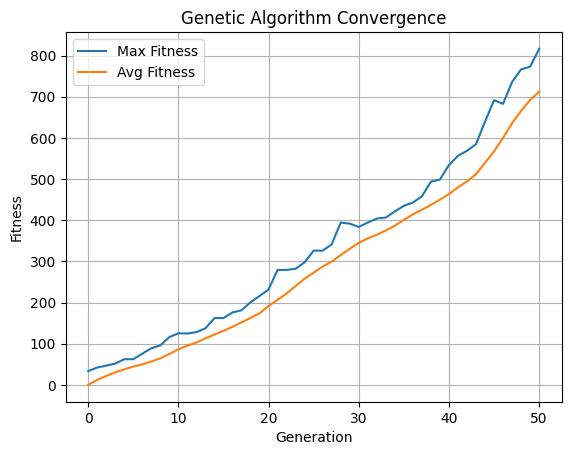

In [3]:
import matplotlib.pyplot as plt

# Extract statistics
generations = log.select("gen")
max_fitness = log.select("max")
avg_fitness = log.select("avg")

# Plot
plt.plot(generations, max_fitness, label="Max Fitness")
plt.plot(generations, avg_fitness, label="Avg Fitness")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Genetic Algorithm Convergence")
plt.legend()
plt.grid()
plt.show()
